[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0          fantasy adventure fuses Greek mythology contem...
1          Uma Thurman Medusa gorgon coiffure writhing sn...
2          top-notch cast dazzling special effects tide t...
3          Whether audiences get behind Lightning Thief h...
4          really lacking Lightning Thief genuine sense w...
                                 ...                        
1048570    Tourist memorable one thing least first movie ...
1048571    formulaic elements right order 've seen guy in...
1048572    Johnny Depp talented chameleon portrays someon...
1048573    Jolie Depp Romantic locations Intrigue movies ...
1048574    Tourist merely asks sit back enjoy ride makes ...
Name: review_content, Length: 987036, dtype: object


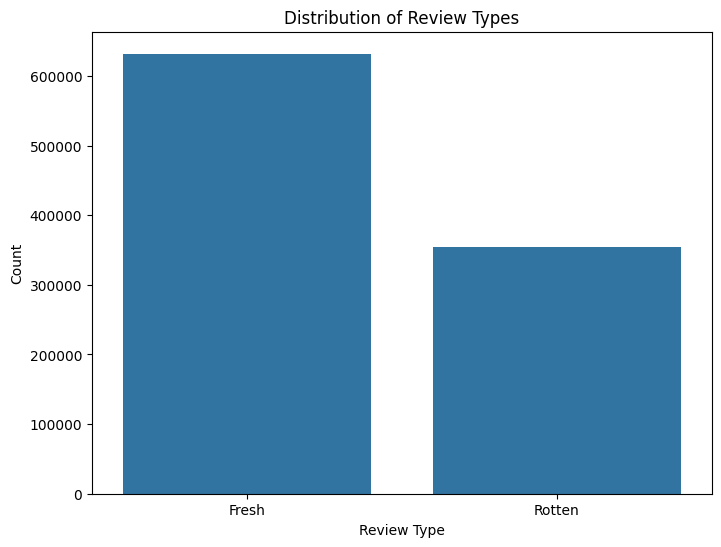

Average Review Length:
review_type
Fresh     12.232724
Rotten    11.778703
Name: review_length, dtype: float64


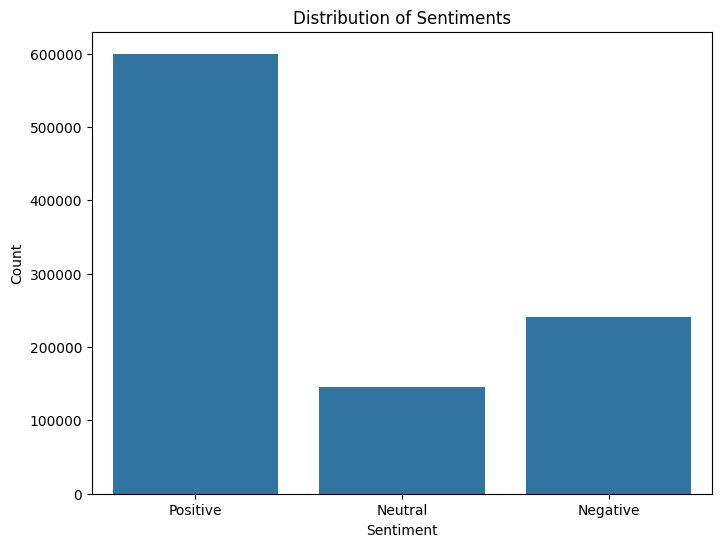

<ipython-input-1-f5802a65d5a6>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


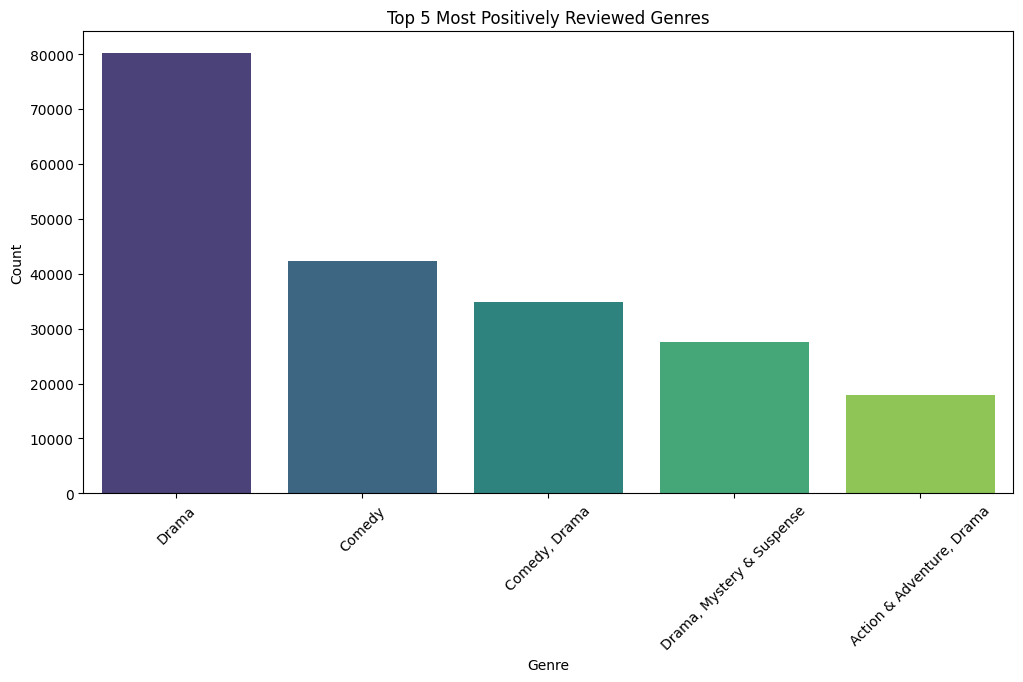

<ipython-input-1-f5802a65d5a6>:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='tab10')


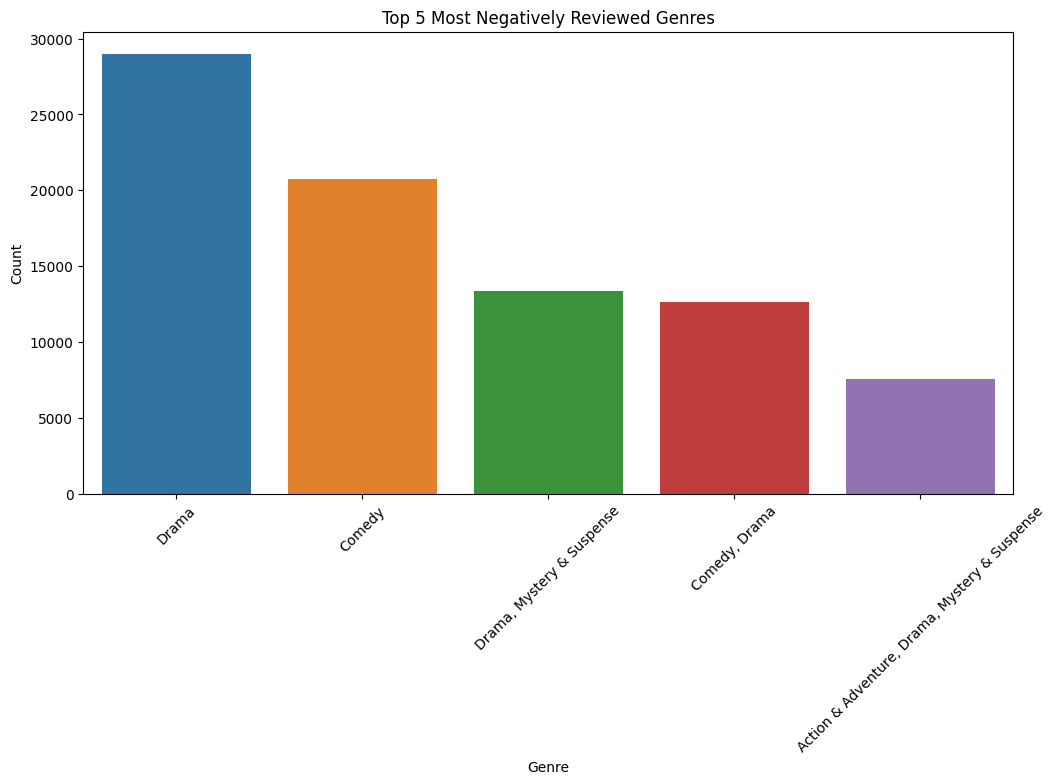

In [ ]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
data = pd.read_csv("rotten_tomatoes_reviews.csv")
data = data.dropna()

# Convert non-string values to strings in the 'review_content' column
data['review_content'] = data['review_content'].astype(str)

# Function to remove punctuations and stop words
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove punctuations
    tokens = [word for word in tokens if word not in string.punctuation]
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

    import re

def clean_text(text):
    text = text.replace("'s", "")
    text = text.replace('"', "")
    text = text.replace("...", "")
    text = text.replace("n't", "")
    text = text.replace("--", "")
    return text

# Apply the clean_text function to the review_content column
data['review_content'] = data['review_content'].apply(clean_text)


# Preprocess the review content
data['review_content'] = data['review_content'].apply(preprocess_text)

# Display the pre-processed data
print(data['review_content'])

# Visualize review_type distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='review_type', data=data)
plt.title('Distribution of Review Types')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()

# Analyze average review length
data['review_length'] = data['review_content'].apply(lambda x: len(x.split()))
avg_review_length = data.groupby('review_type')['review_length'].mean()
print("Average Review Length:")
print(avg_review_length)

from textblob import TextBlob

# Define a function to classify sentiment using TextBlob
def classify_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment classification to each review
data['sentiment'] = data['review_content'].apply(classify_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Filter the dataset for positive reviews
positive_data = data[data['sentiment'] == 'Positive']

# Calculate the frequency of each genre
genre_counts = positive_data['genre'].value_counts().nlargest(5)

# Plot the top 5 most positively reviewed genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Top 5 Most Positively Reviewed Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Filter the dataset for negative reviews
negative_data = data[data['sentiment'] == 'Negative']

# Calculate the frequency of each genre
genre_counts = negative_data['genre'].value_counts().nlargest(5)

# Plot the top 5 most negatively reviewed genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='tab10')
plt.title('Top 5 Most Negatively Reviewed Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-4-ce4b94eeb7f7>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fresh_reviews['emotion'] = fresh_reviews['review_content'].apply(classify_emotion)


Number of fresh movie reviews classified as Happy: 405148
Number of fresh movie reviews classified as Sad: 97466


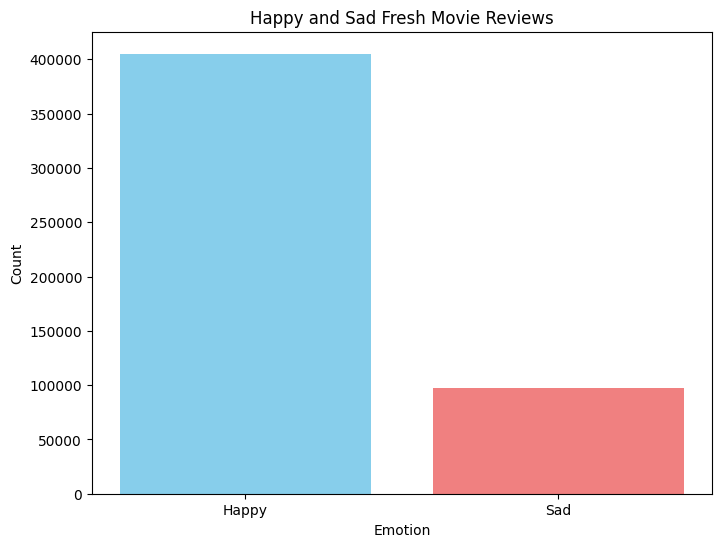

<ipython-input-4-ce4b94eeb7f7>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotten_reviews['emotion'] = rotten_reviews['review_content'].apply(classify_emotion)


Number of rotten movie reviews classified as Happy: 145285
Number of rotten movie reviews classified as Sad: 110737


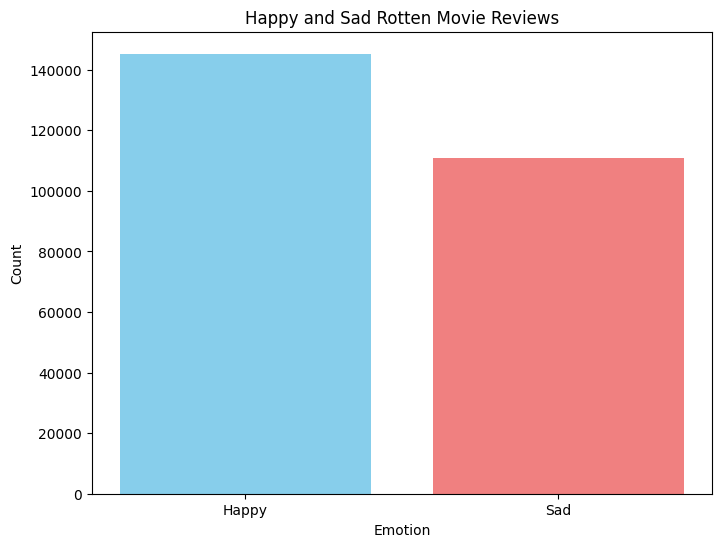

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to classify emotions using VADER
def classify_emotion(text):
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.2:
        return 'Happy'
    elif compound_score <= -0.2:
        return 'Sad'
    else:
      return 'Neutral'


# Filter the dataset for fresh movie reviews
fresh_reviews = data[data['review_type'] == 'Fresh']

# Apply emotion classification to each fresh review
fresh_reviews['emotion'] = fresh_reviews['review_content'].apply(classify_emotion)

# Count the number of happy and sad fresh reviews
happy_count = fresh_reviews[fresh_reviews['emotion'] == 'Happy'].shape[0]
sad_count = fresh_reviews[fresh_reviews['emotion'] == 'Sad'].shape[0]

print("Number of fresh movie reviews classified as Happy:", happy_count)
print("Number of fresh movie reviews classified as Sad:", sad_count)

# Plot the counts of happy and sad fresh movie reviews
plt.figure(figsize=(8, 6))
plt.bar(['Happy', 'Sad'], [happy_count, sad_count], color=['skyblue', 'lightcoral'])
plt.title('Happy and Sad Fresh Movie Reviews')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


# Filter the dataset for fresh movie reviews
rotten_reviews = data[data['review_type'] == 'Rotten']

# Apply emotion classification to each fresh review
rotten_reviews['emotion'] = rotten_reviews['review_content'].apply(classify_emotion)

# Count the number of happy and sad fresh reviews
happy_count = rotten_reviews[rotten_reviews['emotion'] == 'Happy'].shape[0]
sad_count = rotten_reviews[rotten_reviews['emotion'] == 'Sad'].shape[0]

print("Number of rotten movie reviews classified as Happy:", happy_count)
print("Number of rotten movie reviews classified as Sad:", sad_count)

# Plot the counts of happy and sad fresh movie reviews
plt.figure(figsize=(8, 6))
plt.bar(['Happy', 'Sad'], [happy_count, sad_count], color=['skyblue', 'lightcoral'])
plt.title('Happy and Sad Rotten Movie Reviews')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()



In [ ]:
from nltk.tokenize import word_tokenize
from collections import Counter
# Function to get high-frequency words in reviews of a particular emotion category
def get_high_frequency_words(reviews, emotion, top_n=10):
    # Tokenize the reviews
    tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]

    # Flatten the list of tokenized reviews
    flattened_reviews = [word for sublist in tokenized_reviews for word in sublist]

    # Count the frequency of each word
    word_freq = Counter(flattened_reviews)

    # Get the top N most common words for the specified emotion category
    top_words = word_freq.most_common(top_n)

    return top_words

# Get high-frequency words in happy and sad fresh reviews
happy_fresh_words = get_high_frequency_words(fresh_reviews[fresh_reviews['emotion'] == 'Happy']['review_content'], 'Happy')
sad_fresh_words = get_high_frequency_words(fresh_reviews[fresh_reviews['emotion'] == 'Sad']['review_content'], 'Sad')

# Get high-frequency words in happy and sad rotten reviews
happy_rotten_words = get_high_frequency_words(rotten_reviews[rotten_reviews['emotion'] == 'Happy']['review_content'], 'Happy')
sad_rotten_words = get_high_frequency_words(rotten_reviews[rotten_reviews['emotion'] == 'Sad']['review_content'], 'Sad')

# Print the results
print("Top 10 high-frequency words in happy fresh reviews:", happy_fresh_words)
print("Top 10 high-frequency words in sad fresh reviews:", sad_fresh_words)
print("Top 10 high-frequency words in happy rotten reviews:", happy_rotten_words)
print("Top 10 high-frequency words in sad rotten reviews:", sad_rotten_words)


Top 10 high-frequency words in happy fresh reviews: [('film', 72539), ('movie', 45009), ('one', 38539), ('like', 30060), ('best', 24617), ('story', 24449), ('good', 22875), ('great', 19119), ('fun', 17258), ('comedy', 17185)]
Top 10 high-frequency words in sad fresh reviews: [('film', 16744), ('movie', 10006), ('one', 7565), ('horror', 6989), ('story', 5207), ('even', 4000), ('war', 3901), ('like', 3373), ('much', 3227), ('way', 3215)]
Top 10 high-frequency words in happy rotten reviews: [('film', 22076), ('like', 21197), ('movie', 21069), ('one', 11254), ('much', 9770), ('good', 9658), ('story', 8551), ('comedy', 8348), ('even', 7017), ('better', 6850)]
Top 10 high-frequency words in sad rotten reviews: [('film', 16271), ('movie', 15878), ('one', 8207), ('bad', 7508), ('even', 5096), ('story', 4899), ('much', 4866), ('like', 4501), ('horror', 4145), ('never', 3822)]
